# Исследование компьютерной игры

Цель -  выявить определяющие успешность игры закономерности, для определения потенциально популярного продукта.

### Описание входных данных:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры 
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).   


# Содержание проекта

[1. Изучение общей информации](#шаг_1)  
+ [Вывод](#шаг_1.1)  

[2. Подготовка данных](#шаг_2)  
+ [Обработка пропусков](#шаг_2.1)  
+ [Вывод](#шаг_2.2)  

[3. Проведение исследовательского анализа данных](#шаг_3)  
+ [Оценка количественных показателей](#шаг_3.1)  
+ [Определение наиболее продаваемых игровых платформ](#шаг_3.2)  
+ [Построение диаграмм размаха](#шаг_3.3)  
+ [Анализ влияния оценов на объем продаж](#шаг_3.4)  
+ [Анализ жанрового распределения](#шаг_3.5)  
+ [Вывод](#шаг_3.6)  

[4. Составление портрета пользователя](#шаг_4)  
+ [Оценка взаимосвязи рейтинга и прода](#шаг_4.1)  
+ [Вывод](#шаг_4.2)  

[5. Проверка гипотез](#шаг_5)  
+ [Вывод](#шаг_5.1)  

[6. Общий вывод](#шаг_6)  

## 1. Изучение общей информации<a id="шаг_1"></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats as st
#import warnings
#warnings.filterwarnings("ignore")


In [3]:
display(games.head())
display(games.info())
display(games.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
display(games.duplicated().sum())

0

### Вывод<a id="шаг_1.1"></a>

Предварительное изучение данных говорит о необходимости:
+ Заменить наимененования столбцов;
+ Изменить типы данных в столбцах `Year_of_Release`, `User_Score`
+ Разобраться со строковым значением в `User_Score`
+ Обработать пустые значения

## 2. Подготовка данных<a id="шаг_2"></a>

In [5]:
# Приведем название столбцов к нижнему регистру
games.set_axis(['name', 
                'platform', 
                'year_of_release', 
                'genre', 'na_sales', 
                'eu_sales', 'jp_sales', 
                'other_sales', 
                'critic_score', 
                'user_score', 
                'rating'
               ], axis = 'columns', inplace = True)


In [6]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
# Изменим типы данных в столбце 'year_of_release'
#games['year_of_release'] = pd.to_datetime(games['year_of_release']).dt.strftime("%Y")
games['year_of_release'] = games['year_of_release'].astype('Int64')


In [8]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


None

### Обработаем пропуски<a id="шаг_2.1"></a>

В столбце `name` есть две строки с отсутствующим именем. Т.к. кроме имени в них отсутствуют и другие важные параметры, можем их удалить, без существенного влияния на общую выборку

In [10]:
games.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
games.drop(games[games['name'] != games['name']].index, inplace = True)

В столбце `user_score` присутствует 2424 значения tbd (to be determined), что в условиях нашей задачи эквиваленто отсутствию данных , или NaN. Заменим, для единообразия последующей обработки и преобразуем тип столбца во Float.

In [12]:
games['user_score'].replace('tbd', np.nan, inplace = True)
games['user_score'] = games['user_score'].astype('Float64')


In [13]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

Имеем значительное количество пропусков в столбцах `critic_score` и `user_score`. Логично предположить, что оценки выставляемые пользователями и критиками, могут быть схожи. Оценим корреляционную зависимость между этими оценками. Видим, что она выше средней, соответственно для заполнения пустых значений пользоветельскоих оценок, можем воспользоваться оценками критиков и наоборот. При замене оценок будем приводить их к одной системе (100 бальная для критиков, 10 бальная для пользователей). Данный метод, конечно, придусматривает некую погрешность, но примем ее как допустимую.

In [14]:
display(games.query('(critic_score == critic_score) and (user_score == user_score)')
            .loc[:, ['critic_score', 'user_score']]
            .corr())

,critic_score,user_score
critic_score,1.000000,0.580878
user_score,0.580878,1.000000


Оценим, какое количество пустых значений мы таким образом сможем заполнить:

In [15]:
len(games.query('(critic_score != critic_score) and (user_score == user_score)'))

573

In [16]:
games.query('(critic_score != critic_score) and (user_score == user_score)').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+


In [17]:
len(games.query('(critic_score == critic_score) and (user_score != user_score)'))

1120

In [18]:
games.query('(critic_score == critic_score) and (user_score != user_score)').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.2,0.28,85.0,NaN,T
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+
440,Need for Speed III: Hot Pursuit,PS,1998,Racing,2.14,0.86,0.0,0.13,88.0,NaN,E
637,Riven: The Sequel to Myst,PC,1997,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,NaN,E


In [19]:
def get_score(row):
    if (row['critic_score'] != row['critic_score']) and (row['user_score'] == row['user_score']):
        row['critic_score'] = row['user_score'] * 10
        return row
    if (row['critic_score'] == row['critic_score']) and (row['user_score'] != row['user_score']):
        row['user_score'] = row['critic_score'] / 10
        return row
    return row


In [20]:
games = games.apply(get_score, axis = 1)

In [21]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8710 non-null float64
user_score         8710 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


None

Заменим пустые значения года выпуска игры и оценок на нули, сугубо для того, чтобы данные строки не выпадали из дальнейшего анализа.  Т.к. нулевых значений по данным столбцам в исходных данных у нас не было, мы будем однозначно понимать, что нулевые значения - это изначально пустые данные, которые не были заполнены.  
Отсутствующие значения рейтинга заменим на "unknown".

In [22]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games['rating'] = games['rating'].fillna('unknown')

Оставшиеся пустые значения оценки и рейтинга оставим без заполнения (заменим нулями), т.к. нет достоверный критериев их заполнения. Заполнение средними значениями, например, по выделенным группам объемов продаж, может привести к значительному искажению оценок, а мы их далее будем использовать для оценки тех же самых продаж. Поэтому принимаем решение об использовании тех данных, которые имеются в нашем распоряжении, без искажения.

Кроме того, имеем 269 пустых значений года выпуска игры. Заполним их также нулями, т.к. далее в исследовании мы будем определять "актуальный" период для исследований, что в любом случае предусматривает отсечение большого количества данных. Эти 269 строк также будут отсечены. Удаление же строк нецелесообразно, т.к. данные этих строк могут быть использованы в исследованиях, не требующих информации о дате выхода игры.

Добавим столбец с сумарными продажами игр во всех регионах.

In [23]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38


### Вывод<a id="шаг_2.2"></a>

Главной задачей этого этапы было обработать пропуски и строковые значения в столбце с пользовательской оценкой игр. Строковые значения оценок игры обработали аналогично пустым значениям, проведя перекрестное дополнение отсутствующих значений аналогичной оценкой, полученной по другому каналу. С учетом того, что оценки критиков и пользователей, в подавляющем количестве случаев будут близки или по крайней мере сопоставимы, данный метод посчитаем допустимым, обеспечивающим приемлемую адекватность.  
Пустые значения по прочим столбцам оставили не заполненными, для исключения значительного искажения данных при замене.

## 3. Проведение исследовательского анализа данных<a id="шаг_3"></a>

Оценим , сколько игр выпускалось в разные годы:<a id="шаг_3.1"></a>

In [25]:
pivot_years = games.query('year_of_release > 0').pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

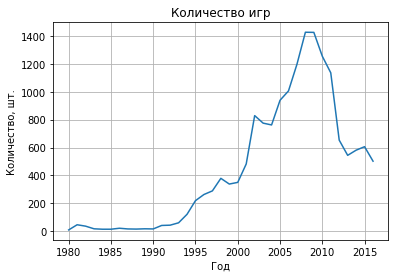

In [26]:
plt.plot(pivot_years.index.get_level_values(0), pivot_years['name'])
plt.title('Количество игр')
plt.xlabel("Год")
plt.ylabel("Количество, шт.")
plt.grid()
plt.show()


Аналогично, посмотрим объем сумарных продаж по годам:

In [27]:
pivot_years = games.query('year_of_release > 0').pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum')

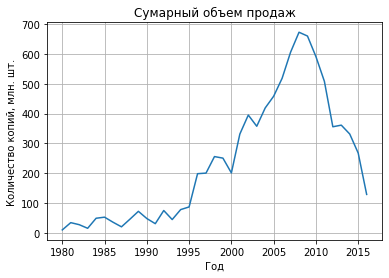

In [28]:
plt.plot(pivot_years.index.get_level_values(0), pivot_years['all_sales'])
plt.title('Сумарный объем продаж')
plt.xlabel("Год")
plt.ylabel("Количество копий, млн. шт.")
plt.grid()
plt.show()


### Вывод

Видим, что с  2008 года произошло резкое падение количество выходящих игр и последние 3 года игровой рынок находится в стагнации. Очевидно, что для прогноза на следующий год, целесообразнее будет использовать именно статистику за последние  3 года, как более точно отражающую современные реалии рынка. Этот период примем за "актуальный период исследования".

Оценим, как менялись продажи по 10 наиболее продаваемым платформам, с течением времени.<a id="шаг_3.2"></a>

In [29]:
# Выберем 10 наиболее продаваемых платформ
platform_pivot = games.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum') \
                    .sort_values(by = 'all_sales', ascending = False) \
                    .head(10)
display(platform_pivot)

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [30]:
# Консолидируем продажи по этим 10 платформам и представим распределение по годам в табличном виде
release_pivot = games.query('platform in @platform_pivot.index and year_of_release > 0') \
            .pivot_table(index = 'year_of_release', values = 'all_sales', columns = 'platform', aggfunc = 'sum')

In [31]:
release_pivot.style.background_gradient(cmap='Blues')

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985.0,0.02,nan,0.04,nan,nan,nan,nan,nan,nan,nan
1988.0,nan,nan,0.03,nan,nan,nan,nan,nan,nan,nan
1992.0,nan,nan,3.03,nan,nan,nan,nan,nan,nan,nan
1994.0,nan,nan,12.87,6.03,nan,nan,nan,nan,nan,nan
1995.0,nan,nan,4.22,35.96,nan,nan,nan,nan,nan,nan
1996.0,nan,nan,10.58,94.7,nan,nan,nan,nan,nan,nan
1997.0,nan,nan,11.27,136.17,nan,nan,nan,nan,nan,nan
1998.0,nan,nan,3.26,169.49,nan,nan,nan,nan,nan,nan
1999.0,nan,nan,4.74,144.53,nan,nan,nan,nan,nan,nan


### Вывод

Получаем неожиданный вывод, любая, некогда популярная платформа живет в среднем около 10 лет, причем пик ее продаж зачастую приходится на первую половину жизненного цикла.  
Единственным исключением является PC платформа, которая в силу своей особенности является долгожителем на рынке игровых платформ, но и ее позиции в последние годы падают, отдавая пальму первенства специализированным игровым платформам.

Выделим данные актуального периода и далее будем работать только с ними:

In [32]:
games_act = games.query('year_of_release >= 2014')
display(games_act.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,unknown,7.98


Выберем ТОП-5 платформ, наиболее продаваемых в последние  3 года:

In [33]:
platform_pivot = games_act.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum') \
                    .sort_values(by = 'all_sales', ascending = False) \
                    .head(5)
display(platform_pivot)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


In [34]:
# Консолидируем по годам продажи этих 5 платформ
release_pivot = games_act.query('platform in @platform_pivot.index') \
            .pivot_table(index = 'year_of_release', values = 'all_sales', columns = 'platform', aggfunc = 'sum')

release_pivot.style.background_gradient(cmap='Blues')

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2014.0,43.76,47.76,100,34.74,54.07
2015.0,27.78,16.82,118.9,11.96,60.14
2016.0,15.14,3.6,69.25,1.52,26.15


Видим, что ими являются фактически 3 платформы: XBox, PlayStation разных поколений и Nintendo 3DS.  Продажи по всем платформам в течение последнего года снижались. Для дальнейшего анализа оставим только последние генерации популярных платформ - PS4, 3DS, XOne.

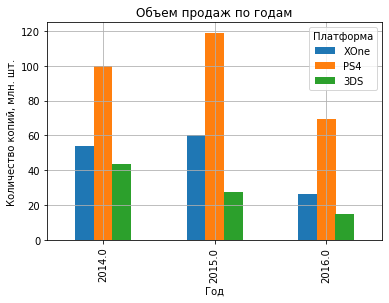

In [35]:
release_pivot.loc[:, ['XOne', 'PS4', '3DS']].plot.bar()
plt.title('Объем продаж по годам')
plt.xlabel("Год")
plt.ylabel("Количество копий, млн. шт.")
plt.legend(title='Платформа')
plt.grid()
plt.show()

Построим "ящик с усами" по глобальным продажам данных платформ<a id="шаг_3.3"></a>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


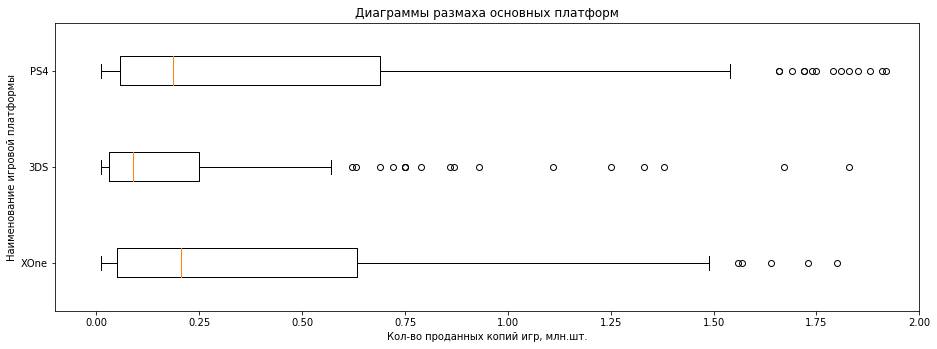

In [36]:
#Разделим каждую платформу на переменные
xone = games_act.query('platform == "XOne"')['all_sales']
ds = games_act.query('platform == "3DS"')['all_sales']
ps4 = games_act.query('platform == "PS4"')['all_sales']
data_to_plot = [xone, ds, ps4]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1]) # left, bottom, width, height
bp = ax.boxplot(data_to_plot, vert = False)
plt.xlim(-0.1, 2)
ax.set_yticklabels(['XOne', '3DS', 'PS4'])
plt.title('Диаграммы размаха основных платформ')
plt.xlabel('Кол-во проданных копий игр, млн.шт.')
plt.ylabel('Наименование игровой платформы')
plt.show()

### Вывод

По диаграммам размаха видим, что структурно, показатели продаж у PS4 и XOne близки. Как по медианным показателям, так и по распределению, что не удивительно, учитывая, что эти платформы являются основными конкурентами среди стационарных консолей. 3DS имеет меньшие как общие, так и медианные объемы продаж, что можно обьяснить тем, что портативные консоли являются более нишевым продуктом.

Рассмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков.<a id="шаг_3.4"></a>

In [37]:
#Построим матрицу корреляции оценок пользователей и критиков
games_act.query('platform == "PS4" and user_score != 0 and critic_score != 0') \
        .loc[:, ['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.567196,0.396310
user_score,0.567196,1.000000,-0.040292
all_sales,0.396310,-0.040292,1.000000


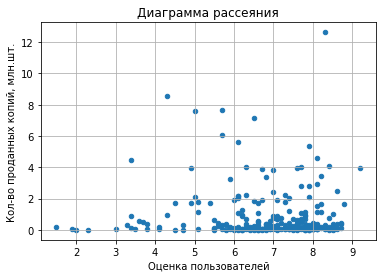

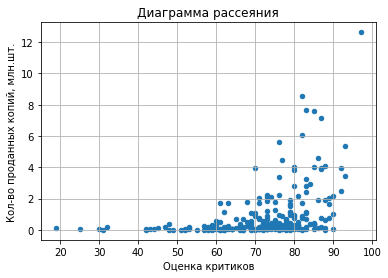

In [38]:
games_act.query('platform == "PS4" and user_score != 0').plot(kind = 'scatter', x='user_score', y='all_sales', grid = True)
plt.title('Диаграмма рассеяния')
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во проданных копий, млн.шт.")
games_act.query('platform == "PS4" and critic_score != 0').plot(kind = 'scatter', x='critic_score', y='all_sales', grid = True)
plt.xlabel("Оценка критиков")
plt.ylabel("Кол-во проданных копий, млн.шт.")
plt.title('Диаграмма рассеяния')
plt.show()

### Вывод

По коэффициентам корреляции можем сделать вывод, что между оценкой критиков и объемом продаж существует прямая корреляционная связь. Т.е. при высоких рейтингах у игр зачастую бывают и большие продажи.  
По оценкам пользователей все менее однозначно. Коэффициент корреляции между оценками и продаж несущественный, можно сказать, что зависимость практически отсутствует, кроме того она отрицательная. Т.е. зависимость у этих двух параметров обратная. При высоких оценках пользователей, по диаграмме рассеяния также видны значительные продажи, но вместе с тем имеем единичные высокие продажи и по играм с низкими пользовательскими оценками.

Проведем аналогичное исследование на других популярных платформах:

In [39]:
games_act.query('platform == "3DS" and user_score != 0 and critic_score != 0').loc[:, ['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.00000,0.918160,0.239880
user_score,0.91816,1.000000,0.244761
all_sales,0.23988,0.244761,1.000000


In [40]:
games_act.query('platform == "XOne" and user_score != 0 and critic_score != 0').loc[:, ['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.539738,0.415780
user_score,0.539738,1.000000,-0.064259
all_sales,0.415780,-0.064259,1.000000


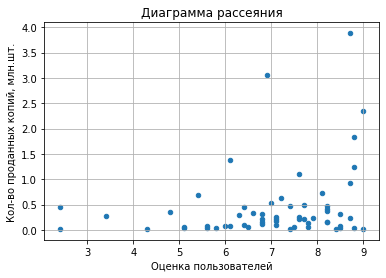

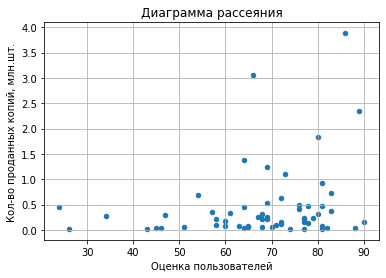

In [41]:
games_act.query('platform == "3DS" and user_score != 0').plot(kind = 'scatter', x='user_score', y='all_sales', grid = True)
plt.title('Диаграмма рассеяния')
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во проданных копий, млн.шт.")
games_act.query('platform == "3DS" and critic_score != 0').plot(kind = 'scatter', x='critic_score', y='all_sales', grid = True)
plt.title('Диаграмма рассеяния')
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во проданных копий, млн.шт.")
plt.show()

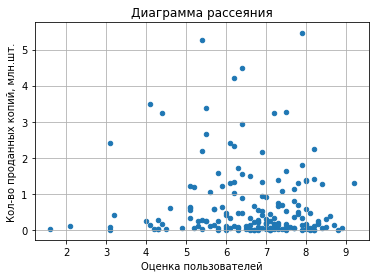

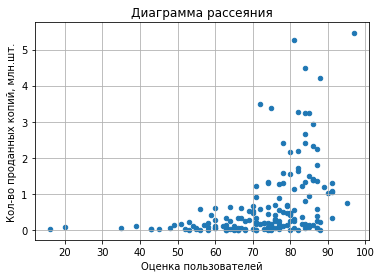

In [42]:
games_act.query('platform == "XOne" and user_score != 0').plot(kind = 'scatter', x='user_score', y='all_sales', grid = True)
plt.title('Диаграмма рассеяния')
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во проданных копий, млн.шт.")
games_act.query('platform == "XOne" and critic_score != 0').plot(kind = 'scatter', x='critic_score', y='all_sales', grid = True)
plt.title('Диаграмма рассеяния')
plt.xlabel("Оценка пользователей")
plt.ylabel("Кол-во проданных копий, млн.шт.")
plt.show()

### Вывод

Корреляционные зависимости и распределения по платформе XOne схожи с PS4.  
По 3DS же оценки пользователей и критиков практически равнозначны по корреляционной зависимости.  Диаграммы рассеяния по ним также практически идентичны.  
Это говорит о том, что для для портативных консолей выводы и рейтинги пользователей и критиков совпадают.

Рассмотрим распределение игр по жанрам.<a id="шаг_3.5"></a>

In [43]:
# ТОП-10 жанров по количеству игр
genre_count = games_act.pivot_table(index = 'genre', values = 'name', aggfunc = 'count') \
        .sort_values(by = 'name', ascending = False) \
        .head(10)
display(genre_count)

,name
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


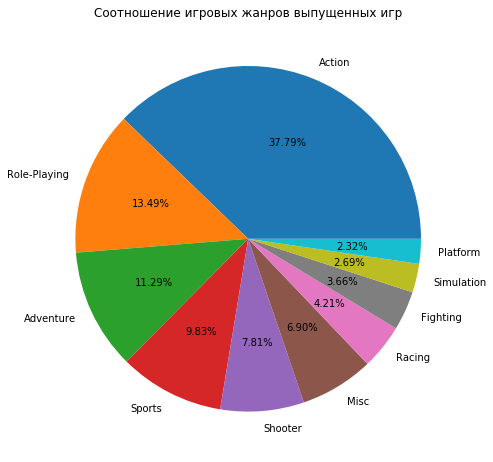

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = genre_count.index
count = genre_count['name']
ax.pie(count, labels = genres, autopct='%1.2f%%')
plt.title('Соотношение игровых жанров выпущенных игр')
plt.show()

In [45]:
# ТОП-10 жанров по продажам
genre_sales = games_act.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'sum') \
        .sort_values(by = 'all_sales', ascending = False) \
        .head(10)
display(genre_sales)

,all_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


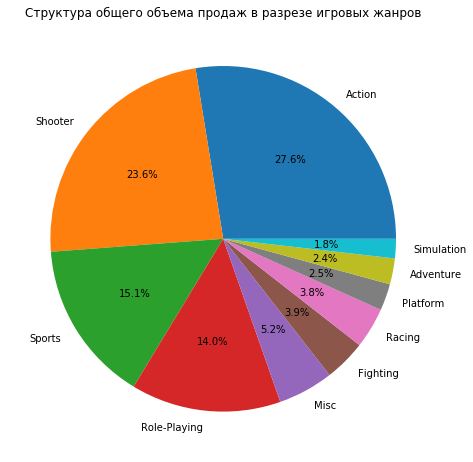

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = genre_sales.index
count = genre_sales['all_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Структура общего объема продаж в разрезе игровых жанров')
plt.show()

Видим, что все ТОП-10 по количеству игр находятся в ТОП-10 по продажам. Такие жанры как Action, Role-Playing, Sports, Shooter находятся в ТОП-5 двух рейтингов.

## Вывод<a id="шаг_3.6"></a>

В данном разделе был проведен исследовательский анализ данных:
+ Выяснено, что средний срок жизни игровой платформы составляет около  10 лет;
+ Определен актуальный период для исследований, равный последним трем годам, когда количество выходящих игр находилось  примерно на одном уровне.
+ Определили ТОП-3 платформ по продажам за последние  3 года - PS4, 3DS, XOne
+ Построили диаграммы рассеяния и размаха для выбранных платформ. Определили, что для платформ PS4 и XOne существует значительная разница между оценками пользователей и критиков и их взаимосвязь с продажами.  Мнения же критиков и пользователей по 3DS довольно близки.  
+ Определены наиболее продаваемые жанры. Ими оказались Action, Role-Playing, Sports, Shooter , они также оказались в лидерах и по количеству игр.

## 4. Составление портрета пользователя каждого региона.<a id="шаг_4"></a>

In [47]:
# Определим самые продаваемые платформы по регионам
sales_region = games_act.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
sales_region.style.background_gradient(cmap='Blues')

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0,0.36,0
PSV,3.53,14.54,2.52
Wii,2.59,0,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.3


Визуализируем эту таблицу:

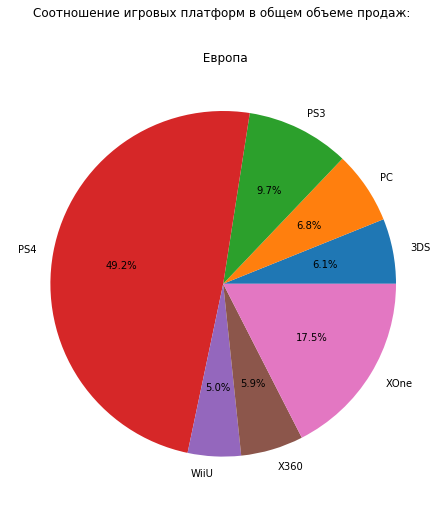

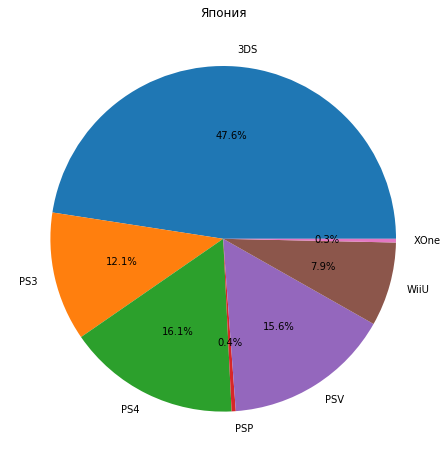

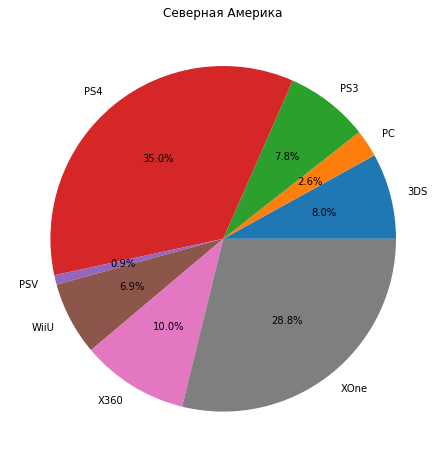

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = sales_region[sales_region['eu_sales'] > 4].index
count = sales_region[sales_region['eu_sales'] > 4]['eu_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Соотношение игровых платформ в общем объеме продаж: \n \n \n Европа')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = sales_region[sales_region['jp_sales'] > 0.1].index
count = sales_region[sales_region['jp_sales'] > 0.1]['jp_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Япония')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = sales_region[sales_region['na_sales'] > 2.5].index
count = sales_region[sales_region['na_sales'] > 2.5]['na_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Северная Америка')
plt.show()

In [49]:
# Самые популярные жанры по регионам
genre_region = games_act.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
genre_region.style.background_gradient(cmap='Blues')

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.6,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.8,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


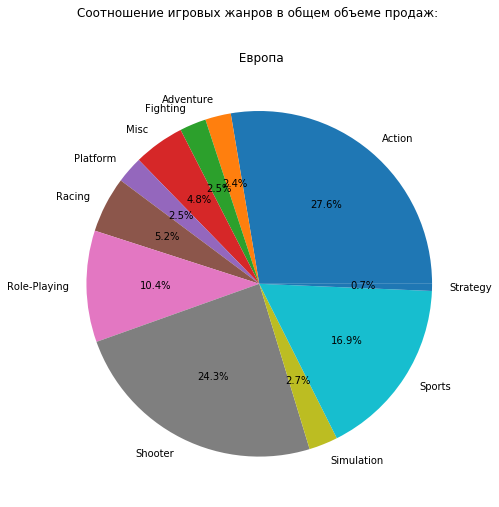

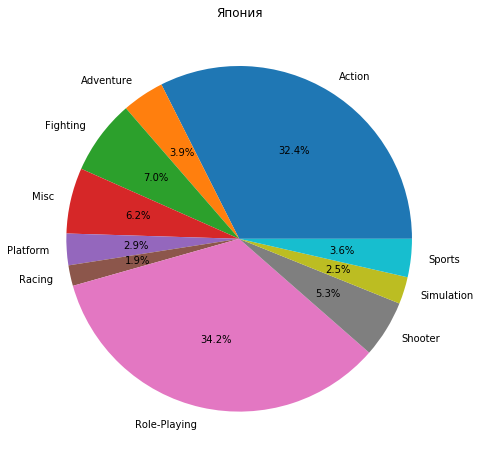

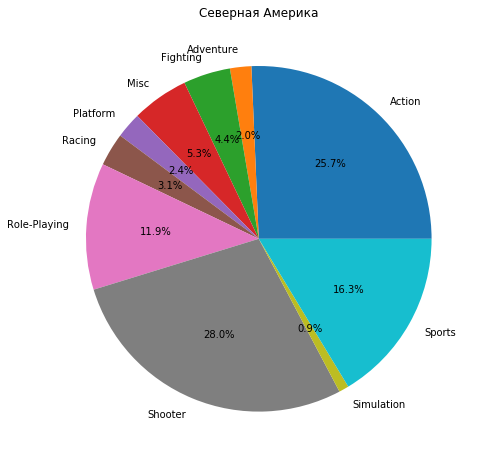

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = genre_region[genre_region['eu_sales'] > 1].index
count = genre_region[genre_region['eu_sales'] > 1]['eu_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Соотношение игровых жанров в общем объеме продаж: \n \n \n Европа')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = genre_region[genre_region['jp_sales'] > 1].index
count = genre_region[genre_region['jp_sales'] > 1]['jp_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Япония')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = genre_region[genre_region['na_sales'] > 1].index
count = genre_region[genre_region['na_sales'] > 1]['na_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Северная Америка')
plt.show()

Оценим взаимосвязь рейтинга и продаж<a id="шаг_4.1"></a>

In [51]:
rating_region = games_act.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
rating_region.style.background_gradient(cmap='Blues')

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.9,64.72


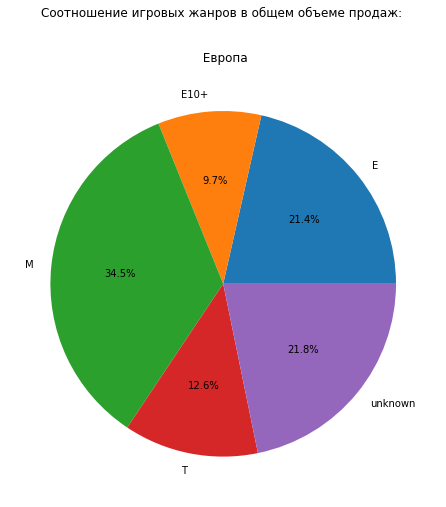

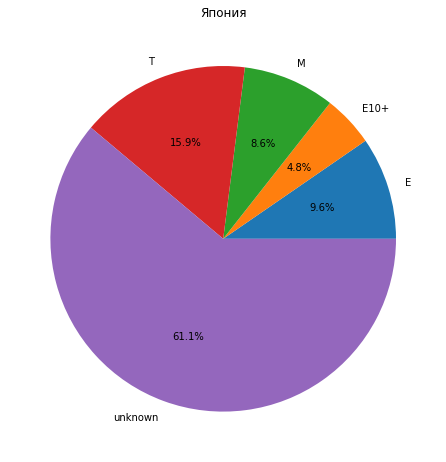

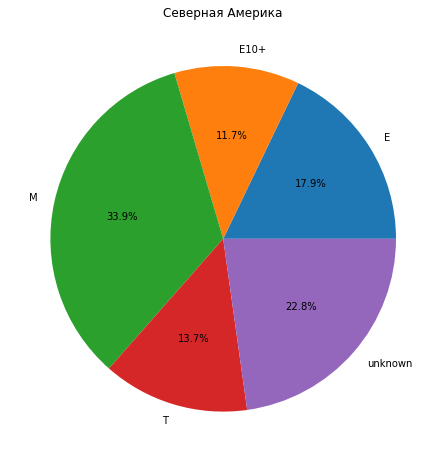

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = rating_region.index
count = rating_region['eu_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Соотношение игровых жанров в общем объеме продаж: \n \n \n Европа')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = rating_region.index
count = rating_region['jp_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Япония')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
genres = rating_region.index
count = rating_region['na_sales']
ax.pie(count, labels = genres, autopct='%1.1f%%')
plt.title('Северная Америка')
plt.show()

## Вывод<a id="шаг_4.2"></a>

Полученные данные говорят о том, что есть региональные предпочтения пользователей игровых платформ. В Северной Америке и Европе более популярны стационарные игровые консоли - PS4 и XOne,  в то время как в Японии - портативные 3DS.  
Что касается популярности жанров, то здесь картина примерно одинакова по всем регионам. Наиболее популярными жанрами являются Action для всех регионов, а также Shooter для Америки и Европы. В Японии , наиболее популярны Role-Playing.
Что касается рейтингов ESRB, то наиболее продаваемые игры в Америке и Европе имеют рейтинги «M» («Mature») — «Для взрослых» и «E» («Everyone») — «Для всех».  В Японии же наиболее продаваемы игры с рейтингом «T» («Teen») — «Подросткам».
На основании этого, можно сделать вывод о потребительском поведении игроков в разных странах. В Америке и Европе они идентичны, где основными потребителями игр являются взрослые люди, старше  17 лет. В Японии же это подростки от 13 до 17 лет.  

Данные выводы сделаны на основе имеющихся данных, которые недостаточно полные, особенно по Японии.  Неизвестные рейтинги обозначены как "unknown".
Но если экстраполировать выводы по имеющимся данным на общую выборку, то вероятно мы получили более адекватные результаты по рынкам Америки/Европы и менее адекватные по Японии.  
В идеале, конечно, необходимо было бы реализовать дополнительный сбор данных для заполнения недостающих рейтингов реальными значениями. Для учебной задачи это возможно и является излишним усложнением в условиях ограниченности времени, но для реальной было бы неизбежной необходимостью.


## 5. Проверка гипотез <a id="шаг_5"></a>

Проверим гипотезу о равенстве пользовательских рейтингов платформ XOne и PC. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind

In [53]:
rating_xone = games_act.query('platform == "XOne" and user_score == user_score')['user_score']
rating_pc = games_act.query('platform == "PC" and user_score == user_score')['user_score']
display(np.var(rating_xone),np.var(rating_pc))

9.693452600800246

8.326077803605106

Дисперсии двух выборок у нас различны, поэтому параметр equal_var метода, установим равным False.

В качестве нулевой гипотезы примем: "Средние пользовательские рейтинги платформ XOne и PC равны."  
Альтернативная гипотеза, соответственно,  "Средние пользовательские рейтинги платформ XOne и PC различны."  

In [54]:
alpha = 0.05
results = st.ttest_ind(rating_xone, rating_pc, equal_var = False)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.41831099931727866
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу о равенстве пользовательских рейтингов жанров Action и Sports. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind

In [55]:
rating_action = games_act.query('genre == "Action" and user_score == user_score')['user_score']
rating_sports = games_act.query('genre == "Sports" and user_score == user_score')['user_score']
display(np.var(rating_action),np.var(rating_sports))

12.296837830572526

7.140388102310867

Дисперсии двух выборок у нас различны, поэтому параметр equal_var метода, установим равным False.

В качестве нулевой гипотезы примем: "Средние пользовательские рейтинги жанров Action и Sports равны."  
Альтернативная гипотеза, соответственно,  "Средние пользовательские рейтинги жанров Action и Sports различны."  

In [56]:
alpha = 0.05
results = st.ttest_ind(rating_action, rating_sports, equal_var = False)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0007109471096781423
Отвергаем нулевую гипотезу


## Вывод<a id="шаг_5.1"></a>

Были сформулированы две нулевых гипотезы о равенстве  средних пользовательских рейтингов по платформам XOne и PC и равенстве  средних пользовательских рейтингов по жанрам Sport и Action.  
Полученные значения p-value говорят о том, что с вероятностью около 13% первая нулевая гипотеза верна. Вероятность же получения результата по второй нулевой гипотезе ничтожна мала.


# 6. Общий вывод<a id="шаг_6"></a>

Целью нашего исследования было выявить потенциально популярный продукт на следующих год, для планирования рекламного бюджета.  
Для максимизации потенциальной прибыли рекомендуем сосредоточниться на платформе PS4, которая в предыдущие годы обеспечивала максимальный объем продаж, двукратно превышающий ближайшего конкурента, и с большой долей вероятности обеспечит его  в следующем году, т.к. платформа находится  в первой половине своего жизненного 10-летнего цикла, когда продажи максимальны.  
Кроме того, для минимизации затрат, рекомендуется сосредоточниться на пользователях двух регионов - Северной америки и Европы, т.к. они показывают схожие потребительские привычки.  
В качестве приоритетного жанра новой игры необходимо выбрать Shooter либо Action, причем ориентированную на взрослую целевую аудиторию старше 17 лет.  
Все вышеуказанные рекомендации позволят максимизировать продажи и как следствие прибыль.

